In [1574]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
from scipy.optimize import curve_fit
import lmfit


In [1575]:
data_path = r"C:\Users\richa\Documents\lab fisica\prática3\data\Riboderlc75000.csv"
data = pd.read_csv(data_path)
data_1 = data['Time(s)'].apply(lambda x: x + abs(data['Time(s)'].min()))
data['Time(s)'] = data_1
data

,Time(s),CH1V,CH2V
0,0.000000e+00,1.744267,-0.016667
1,5.000000e-07,1.793600,-0.018133
2,1.000000e-06,1.827733,-0.010000
3,1.500000e-06,1.864000,-0.015333
4,2.000000e-06,1.904533,-0.020133
...,...,...,...
995,4.975000e-04,-1.994400,-0.025467
996,4.980000e-04,-1.946400,-0.022400
997,4.985000e-04,-1.909600,-0.023867
998,4.990000e-04,-1.852267,-0.028000


In [1576]:
def func_V_IC(t, w, fase, Voffset, V_0):
    return V_0*np.sin(2*np.pi*w*t + fase) + Voffset

ajuste = lmfit.Model(func_V_IC)
parametros = ajuste.make_params(w=7400, fase=np.pi/4, Voffset=1, V_0 = 2)
resultado = ajuste.fit(data['CH1V'].to_numpy(), params=parametros, t=data['Time(s)'].to_numpy(), max_nfev=1000000, method='leastsq')
popt = [param.value for param in resultado.params.values()]
resultado


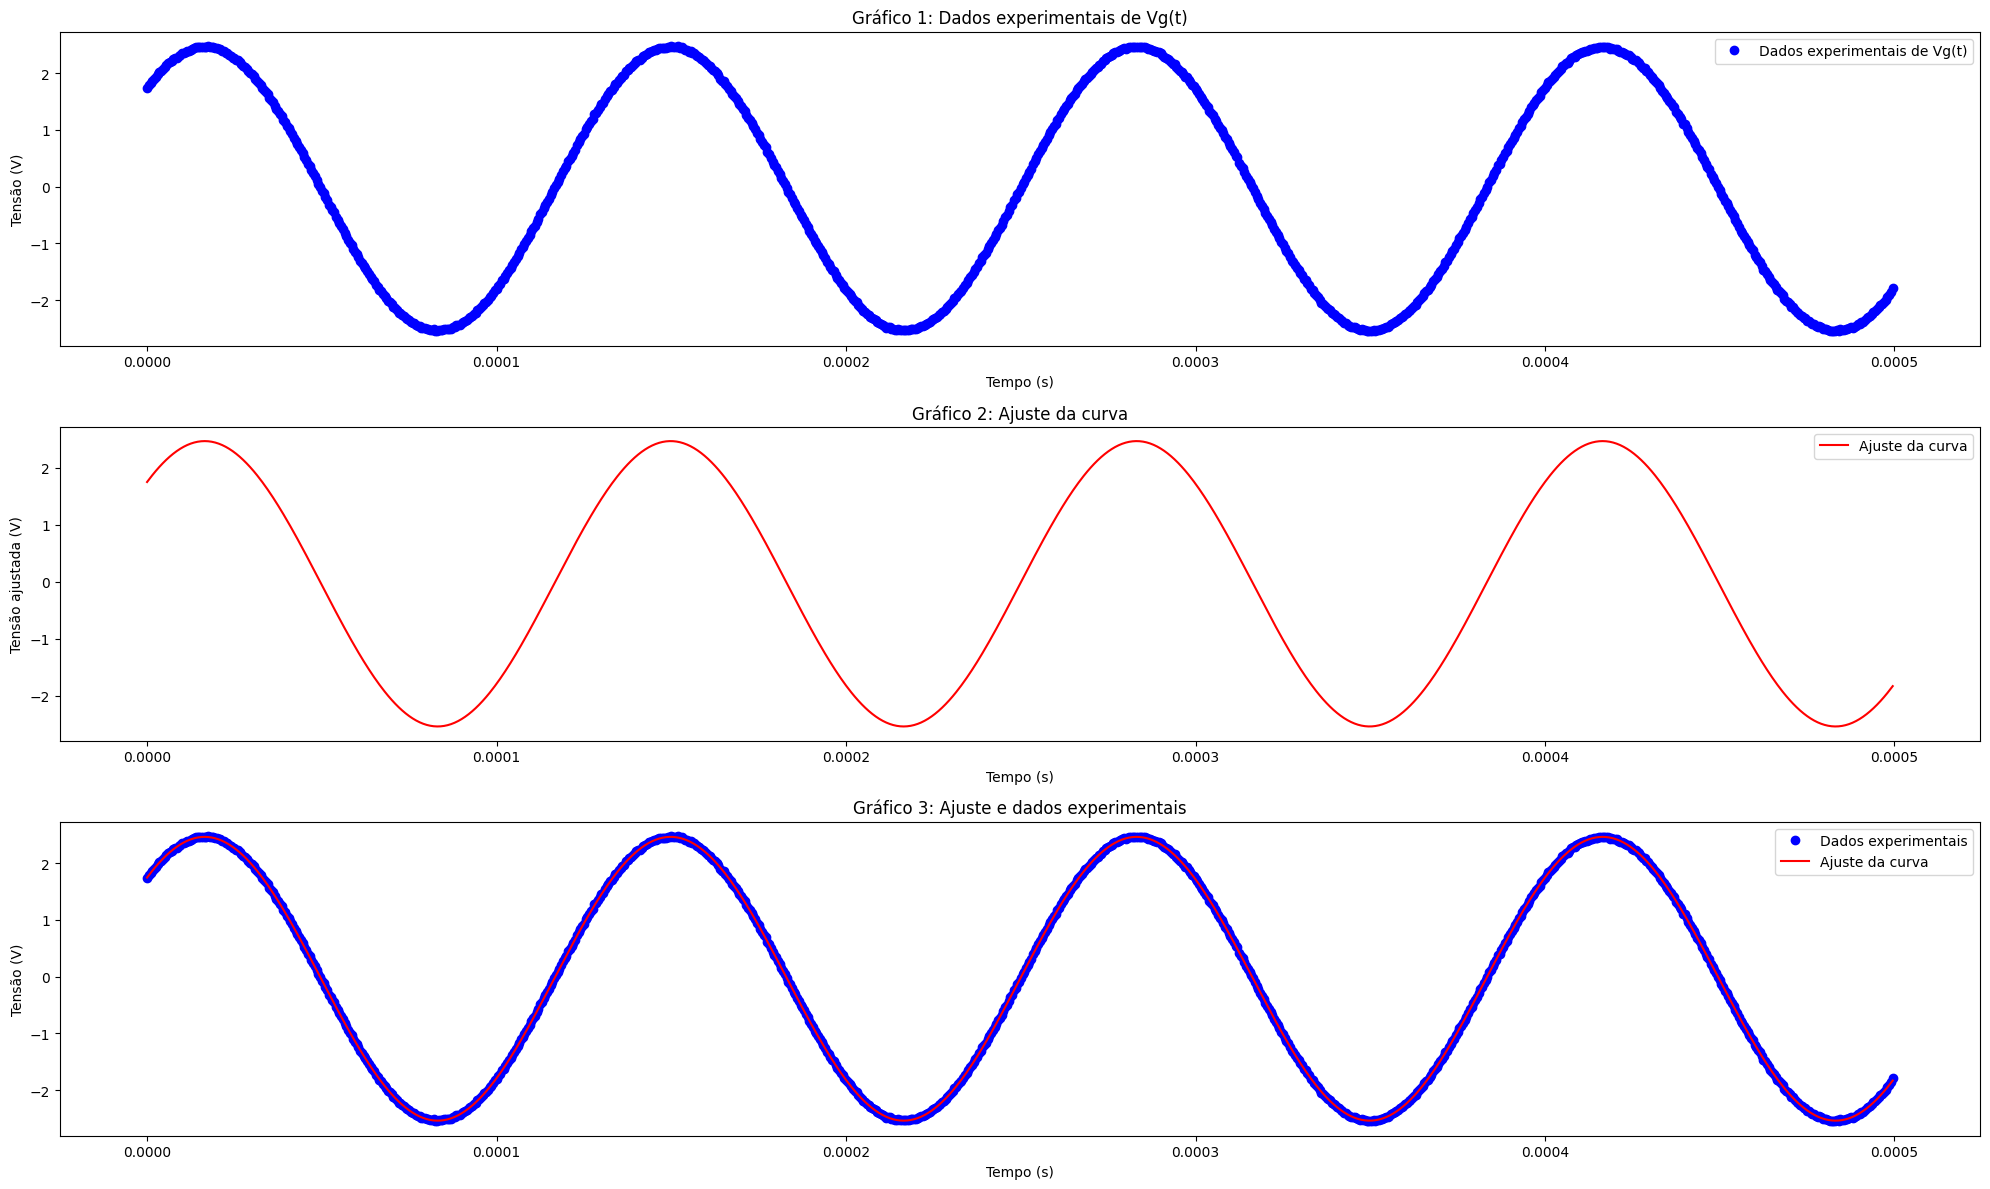

In [1577]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 1, figsize=(20, 12)) 

ax[0].plot(data["Time(s)"], data["CH1V"], 'o', color='blue', label='Dados experimentais de Vg(t)')
ax[0].set_title('Gráfico 1: Dados experimentais de Vg(t)') 
ax[0].set_xlabel('Tempo (s)') 
ax[0].set_ylabel('Tensão (V)')  
ax[0].legend()

ax[1].plot(data['Time(s)'], func_V_IC(data["Time(s)"], *popt), color='red', label='Ajuste da curva')
ax[1].set_title('Gráfico 2: Ajuste da curva')  
ax[1].set_xlabel('Tempo (s)')  
ax[1].set_ylabel('Tensão ajustada (V)')  
ax[1].legend()

ax[2].plot(data["Time(s)"], data["CH1V"], 'o', color='blue', label='Dados experimentais')
ax[2].plot(data['Time(s)'], func_V_IC(data["Time(s)"], *popt), color='red', label='Ajuste da curva')
ax[2].set_title('Gráfico 3: Ajuste e dados experimentais')  
ax[2].set_xlabel('Tempo (s)')  
ax[2].set_ylabel('Tensão (V)')  
ax[2].legend()

plt.tight_layout()
plt.show()


In [1578]:
ajuste = lmfit.Model(func_V_IC)
parametros = ajuste.make_params(w=7000, fase=np.pi/4, Voffset=1, V_0 = 2)
resultado = ajuste.fit(data['CH2V'].to_numpy(), params=parametros, t=data['Time(s)'].to_numpy(), max_nfev=10000, method='leastsq')
popt = [param.value for param in resultado.params.values()]
resultado

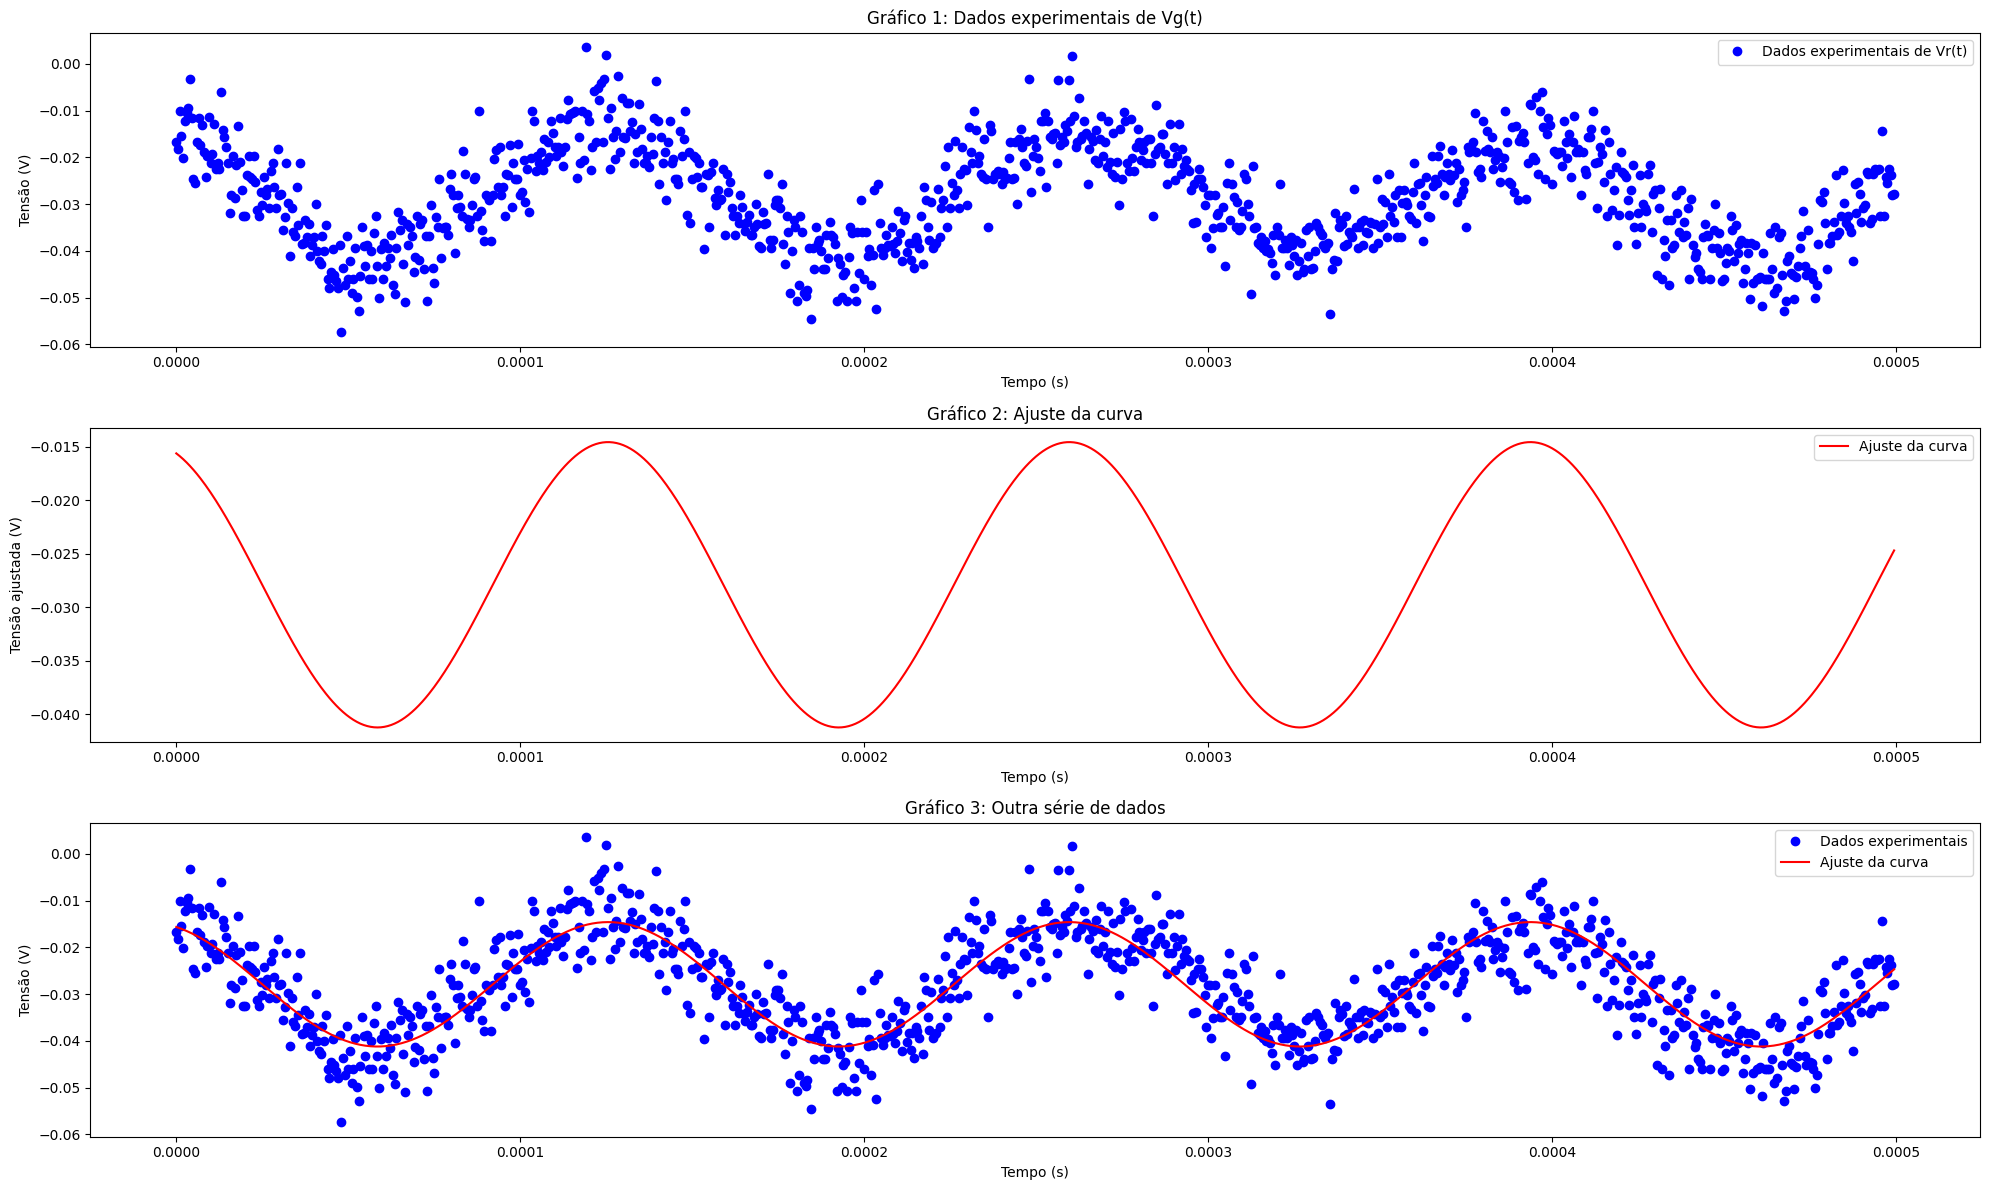

In [1579]:
fig, ax = plt.subplots(3, 1, figsize=(20, 12)) 

ax[0].plot(data["Time(s)"], data["CH2V"], 'o', color='blue', label='Dados experimentais de Vr(t)')
ax[0].set_title('Gráfico 1: Dados experimentais de Vg(t)') 
ax[0].set_xlabel('Tempo (s)') 
ax[0].set_ylabel('Tensão (V)')  
ax[0].legend()

ax[1].plot(data['Time(s)'], func_V_IC(data["Time(s)"], *popt), color='red', label='Ajuste da curva')
ax[1].set_title('Gráfico 2: Ajuste da curva')  
ax[1].set_xlabel('Tempo (s)')  
ax[1].set_ylabel('Tensão ajustada (V)')  
ax[1].legend()

ax[2].plot(data["Time(s)"], data["CH2V"], 'o', color='blue', label='Dados experimentais')
ax[2].plot(data['Time(s)'], func_V_IC(data["Time(s)"], *popt), color='red', label='Ajuste da curva')
ax[2].set_title('Gráfico 3: Outra série de dados')  
ax[2].set_xlabel('Tempo (s)')  
ax[2].set_ylabel('Tensão (V)')  
ax[2].legend()

plt.tight_layout()
plt.show()

In [1580]:
data['CH3V'] = data['CH1V'] - data['CH2V']

In [1581]:
ajuste = lmfit.Model(func_V_IC)
parametros = ajuste.make_params(w=7400, fase=np.pi/4, Voffset=1, V_0 = 2)
resultado = ajuste.fit(data['CH1V'].to_numpy(), params=parametros, t=data['Time(s)'].to_numpy(), max_nfev=1000000, method='lbfgsb')
popt = [param.value for param in resultado.params.values()]
resultado

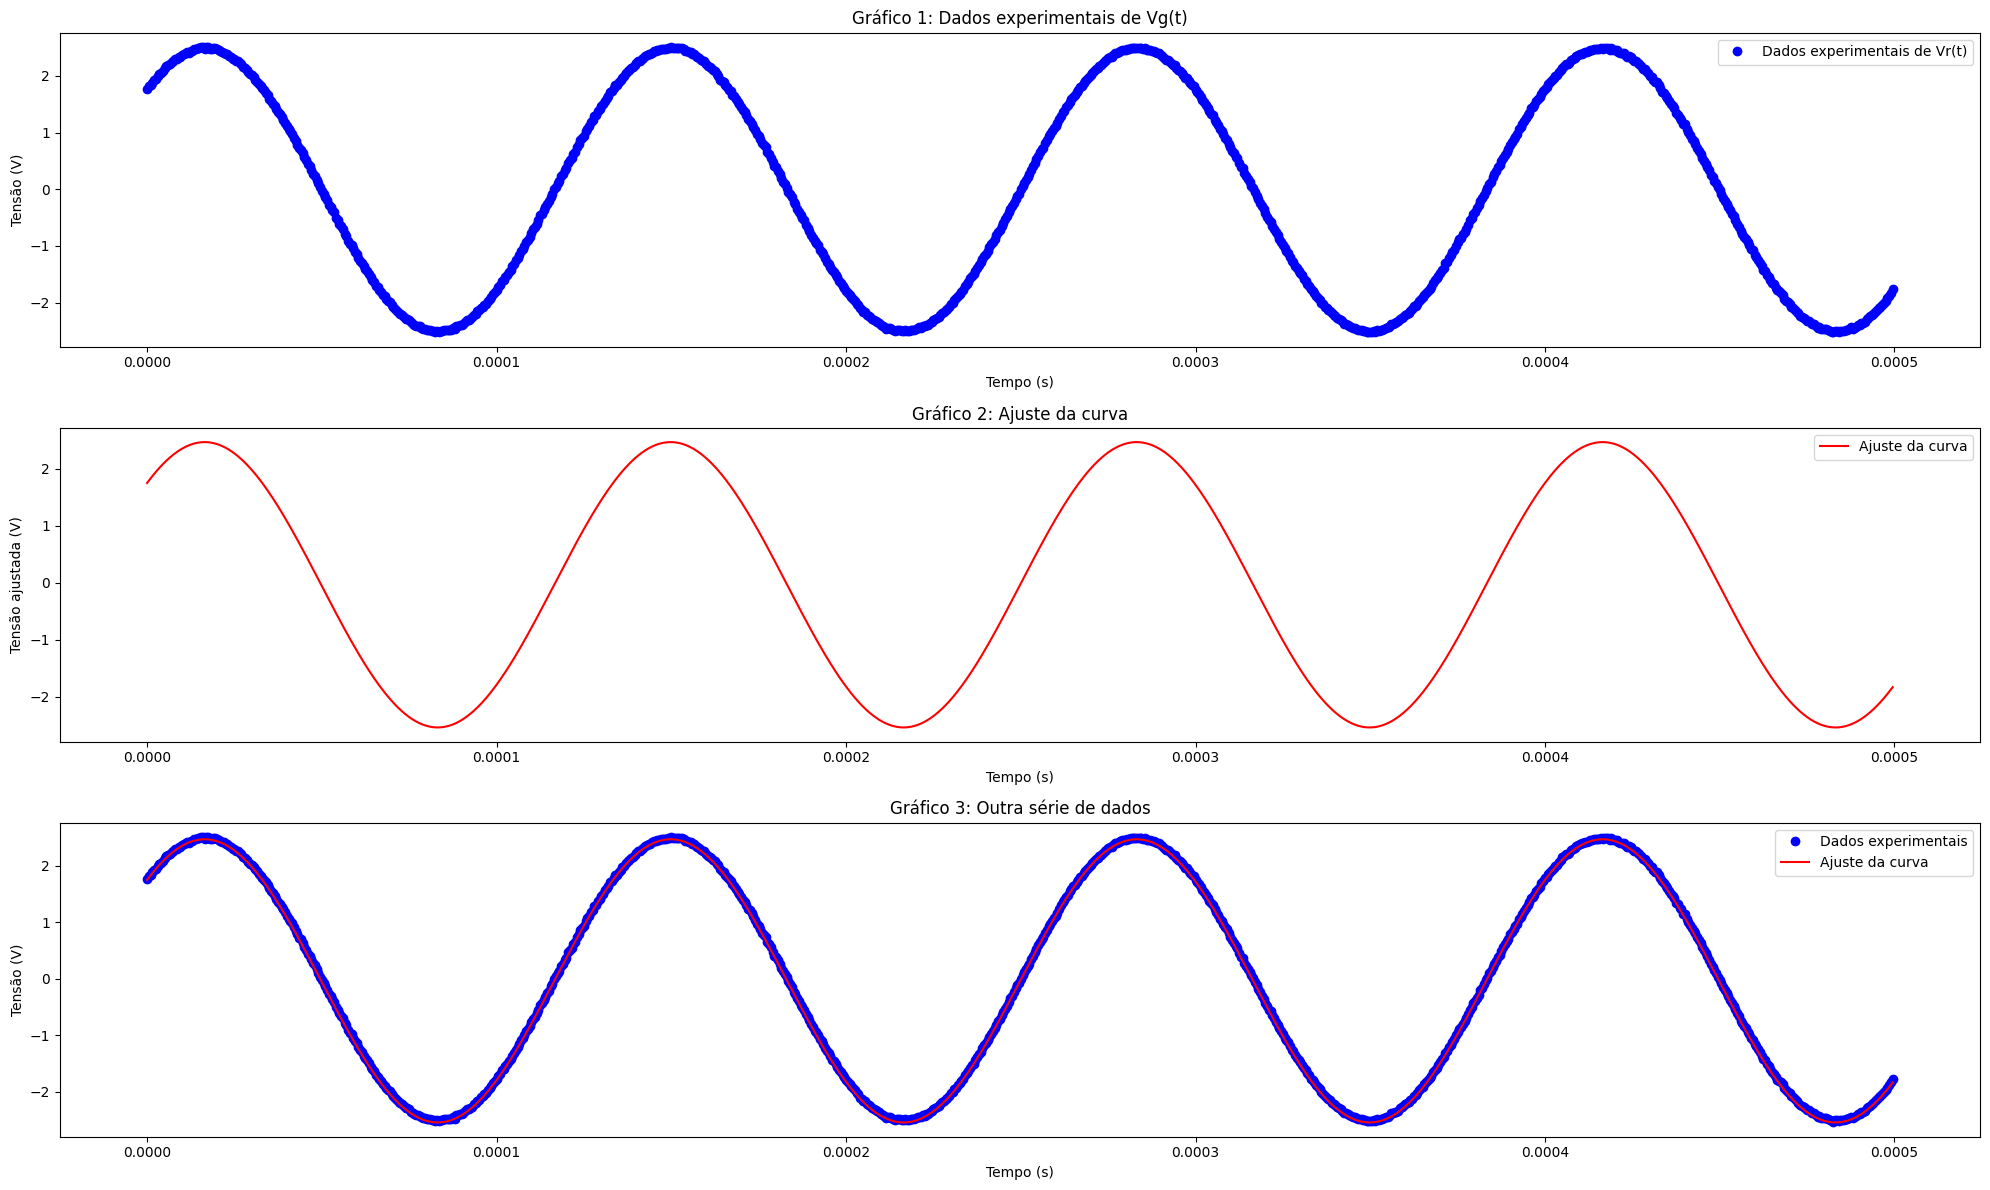

In [1582]:
fig, ax = plt.subplots(3, 1, figsize=(20, 12)) 

ax[0].plot(data["Time(s)"], data["CH3V"], 'o', color='blue', label='Dados experimentais de Vr(t)')
ax[0].set_title('Gráfico 1: Dados experimentais de Vg(t)') 
ax[0].set_xlabel('Tempo (s)') 
ax[0].set_ylabel('Tensão (V)')  
ax[0].legend()

ax[1].plot(data['Time(s)'], func_V_IC(data["Time(s)"], *popt), color='red', label='Ajuste da curva')
ax[1].set_title('Gráfico 2: Ajuste da curva')  
ax[1].set_xlabel('Tempo (s)')  
ax[1].set_ylabel('Tensão ajustada (V)')  
ax[1].legend()

ax[2].plot(data["Time(s)"], data["CH3V"], 'o', color='blue', label='Dados experimentais')
ax[2].plot(data['Time(s)'], func_V_IC(data["Time(s)"], *popt), color='red', label='Ajuste da curva')
ax[2].set_title('Gráfico 3: Outra série de dados')  
ax[2].set_xlabel('Tempo (s)')  
ax[2].set_ylabel('Tensão (V)')  
ax[2].legend()

plt.tight_layout()
plt.show()

In [1583]:
data_path = r'C:\Users\richa\Documents\lab fisica\prática3\data\RigolDSrlcbode0.csv'
data = pd.read_csv(data_path)
data

,Freq(Hz),Gain(dB),Phase
0,215.625000,-15.839651,-73.631531
1,228.401584,-15.528839,-79.737350
2,241.935229,-15.678203,-80.337830
3,256.270792,-16.094830,-81.272339
4,271.455791,-16.183392,-80.442329
...,...,...,...
91,40616.183492,-33.159508,84.705482
92,43022.843666,-32.890083,86.972885
93,45572.107421,-32.312267,84.717407
94,48272.424550,-31.875835,86.280807


In [1584]:
def func_RLC_C(w):
    C = 0.4e-06
    L = 0.001
    R = 300
    return 20*np.log10(1/(w*C*np.sqrt(R**2 + (w*L - 1/(w*C))**2)))

def func_RLC_R(w):
    C = 0.4e-06
    L = 0.001
    R = 300
    return 20*np.log10(R/(np.sqrt(R**2 + (w*L - 1/(w*C))**2)))

def func_RLC_C_L(w):
    C = 0.47e-06
    L = 0.001
    R = 300
    return 20*np.log10(np.abs( w*L - 1/(w*C))/ (np.sqrt(R**2 + (w*L - 1/(w*C))**2)))
    

def func_fase(w):
    C = 0.45e-06
    L = 0.001
    R = 321
    return np.arctan((w*L - 1/(w*C))/R)





def func_RLC_C_L(w):
    L=0.001
    R= 300
    C = 0.45e-06
    return 10*np.log10(1 - (R*C*w)/((((R)*C*w)**2 + (L*C*(w**2)-1)**2)**(1/2)))

def func_fase(w):
    RL=21
    L=0.001 
    R=300
    C = 0.45e-06
    return ((np.arctan((L*C*(w**2)-1)/(RL*C*w))-np.arctan((L*C*(w**2)-1)/((R+RL)*C*w)))*180/np.pi)





def rad(x):
    return np.pi*x/180

In [1585]:
def func_RLC_C_L_for_adj(w, R, L, C, RL):
    return 10*np.log10(1 - (R*C*w)/((((R)*C*w)**2 + (L*C*(w**2)-1)**2)**(1/2)))


def func_fase_for_adj(w, R, L, C, RL):
    return ((np.arctan((L*C*(w**2)-1)/(RL*C*w))-np.arctan((L*C*(w**2)-1)/((R)*C*w)))*180/np.pi)


In [1586]:
ajuste = lmfit.Model(func_RLC_C_L_for_adj)
parametros = ajuste.make_params(R=300, L=0.001, C=0.45e-06, RL=25)
parametros['R'].set(min=200, max=400)  # Resistência entre 0 e 1000 Ohms
parametros['L'].set(min=1e-6, max=0.01)  # Indutância entre 1 µH e 10 mH
parametros['C'].set(min=1e-9, max=1e-3)
parametros['RL'].set(min=15, max=25)
resultado = ajuste.fit(data['Gain(dB)'].to_numpy(), params=parametros, w=2*np.pi*data['Freq(Hz)'].to_numpy(), max_nfev=10000, method='dual-anneal')
popt = [param.value for param in resultado.params.values()]
resultado

In [1587]:
ajuste = lmfit.Model(func_fase_for_adj)
parametros = ajuste.make_params(R=300, L=0.001, C=0.45e-06, RL=21)
parametros['R'].set(min=200, max=400)  # Resistência entre 0 e 1000 Ohms
parametros['L'].set(min=1e-6, max=0.01)  # Indutância entre 1 µH e 10 mH
parametros['C'].set(min=1e-9, max=1e-3)
resultado = ajuste.fit(data['Phase'].to_numpy(), params=parametros, w=2*np.pi*data['Freq(Hz)'].to_numpy(), max_nfev=10000, method='dual-anneal')
popt_1 = [param.value for param in resultado.params.values()]
resultado

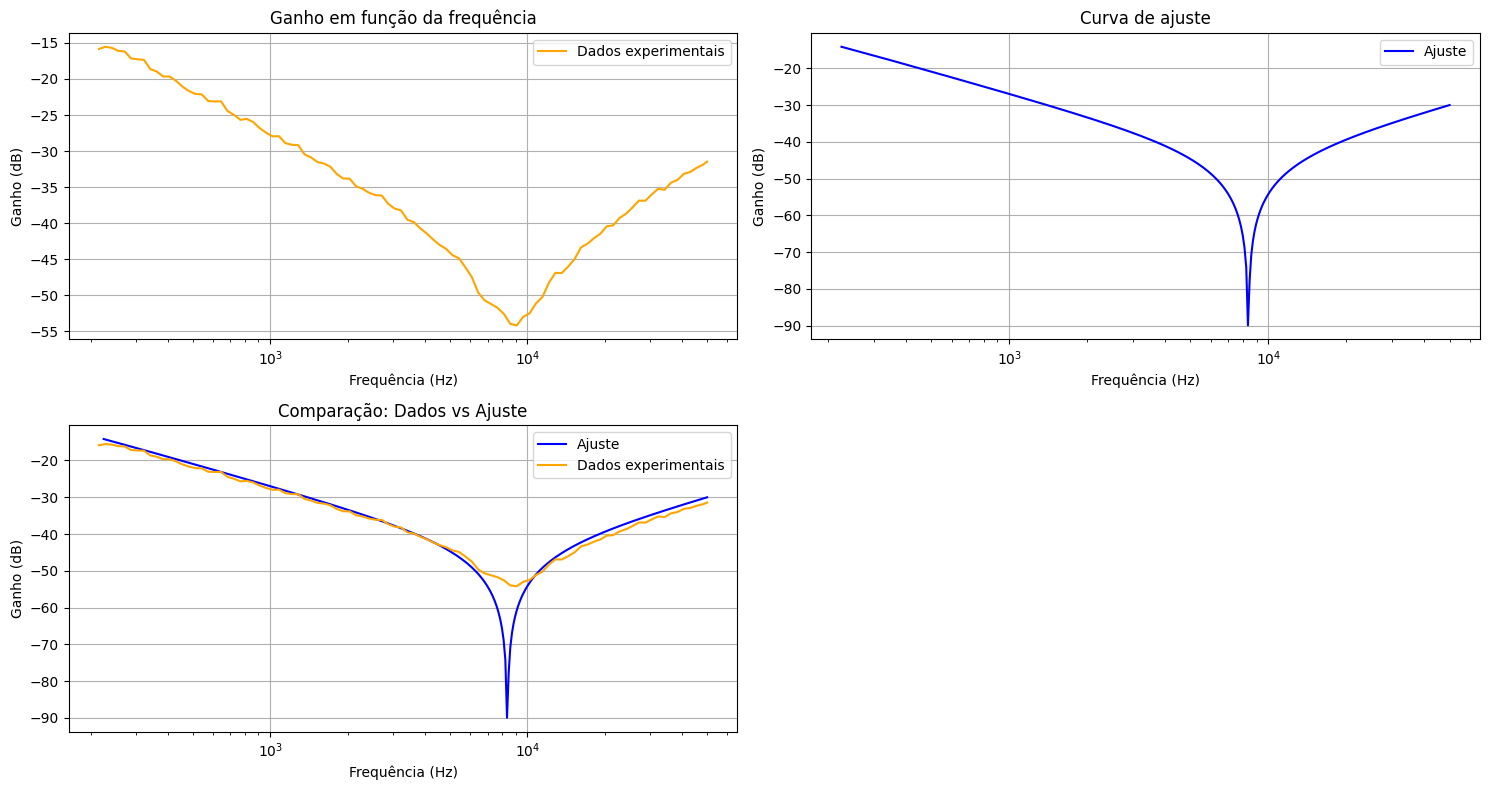

In [1588]:
w_data = np.linspace(225, 50000, 400)


# Criar subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 8))

# Subplot 1: Ajuste de dados
ax[0, 0].plot(data['Freq(Hz)'], data['Gain(dB)'], color='orange', label='Dados experimentais')
ax[0, 0].set_xscale('log')
ax[0, 0].set_title("Ganho em função da frequência")
ax[0, 0].set_xlabel("Frequência (Hz)")
ax[0, 0].set_ylabel("Ganho (dB)")
ax[0, 0].legend()
ax[0, 0].grid(True)

# Subplot 2: Dados ajustados
ax[0, 1].plot(w_data, func_RLC_C_L_for_adj(2 * np.pi * w_data, *popt), label='Ajuste', color='blue')
ax[0, 1].set_xscale('log')
ax[0, 1].set_title("Curva de ajuste")
ax[0, 1].set_xlabel("Frequência (Hz)")
ax[0, 1].set_ylabel("Ganho (dB)")
ax[0, 1].legend()
ax[0, 1].grid(True)

# Subplot 3: Comparação entre dados experimentais e ajuste
ax[1, 0].plot(w_data, func_RLC_C_L_for_adj(2 * np.pi * w_data, *popt), label='Ajuste', color='blue')
ax[1, 0].plot(data['Freq(Hz)'], data['Gain(dB)'], color='orange', label='Dados experimentais')
ax[1, 0].set_xscale('log')
ax[1, 0].set_title("Comparação: Dados vs Ajuste")
ax[1, 0].set_xlabel("Frequência (Hz)")
ax[1, 0].set_ylabel("Ganho (dB)")
ax[1, 0].legend()
ax[1, 0].grid(True)

# Subplot 4: Placeholder ou vazio
ax[1, 1].axis("off")  # Deixa vazio ou use conforme necessário

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()

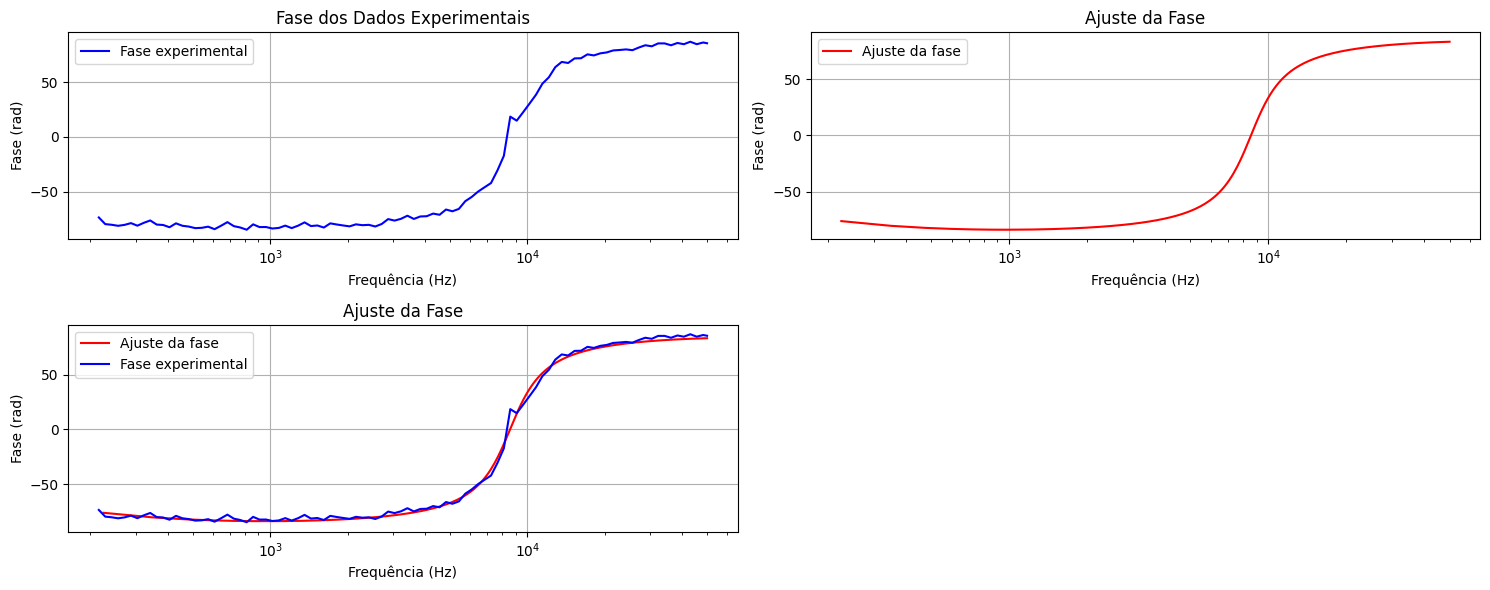

In [1589]:
fig, ax = plt.subplots(2, 2, figsize=(15, 6))

# Subplot 1: Fase dos dados experimentais
ax[0, 0].plot(data['Freq(Hz)'], data['Phase'], color='blue', label='Fase experimental')
ax[0, 0].set_xscale('log')
ax[0, 0].set_title("Fase dos Dados Experimentais")
ax[0, 0].set_xlabel("Frequência (Hz)")
ax[0, 0].set_ylabel("Fase (rad)")
ax[0, 0].legend()
ax[0, 0].grid(True)

# Subplot 2: Ajuste da fase
ax[0, 1].plot(w_data, func_fase_for_adj(2 * np.pi * w_data, *popt_1), color='red', label='Ajuste da fase')
ax[0, 1].set_xscale('log')
ax[0, 1].set_title("Ajuste da Fase")
ax[0, 1].set_xlabel("Frequência (Hz)")
ax[0, 1].set_ylabel("Fase (rad)")
ax[0, 1].legend()
ax[0, 1].grid(True)


ax[1, 0].plot(w_data, func_fase_for_adj(2 * np.pi * w_data, *popt_1), color='red', label='Ajuste da fase')
ax[1, 0].plot(data['Freq(Hz)'], data['Phase'], color='blue', label='Fase experimental')
ax[1, 0].set_xscale('log')
ax[1, 0].set_title("Ajuste da Fase")
ax[1, 0].set_xlabel("Frequência (Hz)")
ax[1, 0].set_ylabel("Fase (rad)")
ax[1, 0].legend()
ax[1, 0].grid(True)

ax[1, 1].axis('off')



# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()